In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [2]:
train_data = pd.read_csv('train_data.csv')

/var/folders/8g/xcrk1n01427828xyh_t8v_000000gn/T/ipykernel_18256/823796514.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train_data.csv')


In [3]:
train_data.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


In [4]:
train_data.shape

(838944, 11)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838742 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838869 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


In [6]:
# taking care of the 'vote' column 
train_data['vote'] = train_data['vote'].str.replace(',', '')
train_data['vote'] = pd.to_numeric(train_data['vote'], errors='coerce')
median_value = train_data['vote'].median()
train_data['vote'].fillna(median_value, inplace=True)

In [7]:
train_data['vote'].unique()

array([4.000e+00, 3.000e+00, 2.000e+00, 1.700e+01, 3.400e+02, 8.000e+00,
       5.000e+00, 1.400e+01, 1.100e+01, 2.900e+01, 1.900e+01, 7.000e+00,
       6.000e+00, 2.800e+01, 3.010e+02, 1.800e+01, 1.000e+01, 9.000e+00,
       3.700e+01, 2.000e+01, 1.200e+01, 3.310e+02, 4.100e+01, 3.300e+01,
       3.800e+01, 1.300e+01, 2.400e+01, 1.600e+01, 2.100e+01, 3.500e+01,
       6.000e+01, 4.800e+01, 1.060e+02, 2.500e+01, 3.200e+01, 4.700e+01,
       1.140e+02, 6.900e+01, 2.300e+01, 5.800e+01, 1.500e+01, 1.570e+02,
       4.400e+01, 6.100e+01, 8.100e+01, 3.400e+01, 2.700e+01, 5.000e+01,
       2.600e+01, 2.200e+01, 3.000e+01, 5.100e+01, 6.700e+01, 9.300e+01,
       1.010e+02, 8.400e+01, 1.540e+02, 3.100e+01, 3.600e+01, 1.710e+02,
       4.000e+01, 5.700e+01, 5.600e+01, 4.300e+01, 6.800e+01, 6.600e+01,
       3.270e+02, 9.100e+01, 1.040e+02, 3.900e+01, 5.300e+01, 9.200e+01,
       1.250e+02, 6.400e+01, 1.580e+02, 9.400e+01, 1.190e+02, 7.200e+01,
       1.280e+02, 1.030e+02, 4.500e+01, 1.100e+02, 

In [8]:
# due to few amount of values in column 'style'
train_data = train_data.drop('style', axis=1)

In [9]:
# to handle the nan values in column 'summary'
train_data = train_data.dropna()

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838667 entries, 0 to 838943
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         838667 non-null  int64  
 1   vote            838667 non-null  float64
 2   verified        838667 non-null  bool   
 3   reviewTime      838667 non-null  object 
 4   reviewerID      838667 non-null  object 
 5   asin            838667 non-null  object 
 6   reviewerName    838667 non-null  object 
 7   reviewText      838667 non-null  object 
 8   summary         838667 non-null  object 
 9   unixReviewTime  838667 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 64.8+ MB


In [11]:
# converting unixReviewTime to a more usable format
train_data['review_date'] = pd.to_datetime(train_data['unixReviewTime'], unit='s')

In [12]:
train_data = train_data.drop('unixReviewTime', axis=1)

In [13]:
train_data.describe()

,overall,vote
count,838667.000000,838667.000000
mean,4.021291,4.600459
std,1.344221,11.803998
min,1.000000,2.000000
25%,3.000000,4.000000
50%,5.000000,4.000000
75%,5.000000,4.000000
max,5.000000,2846.000000


## First Analysis Task
* Plotting the distribution of overall ratings
* Checking if the dataset is balanced or not

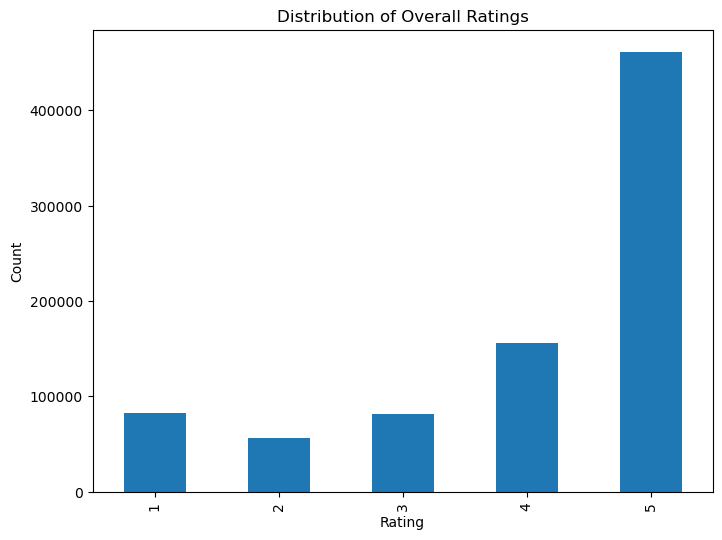

In [14]:
plt.figure(figsize=(8, 6))
train_data['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Due to the large number of samples in the class of five stars against other classes, we can conclude that **the dataset is not balanced**. 

Taking care of this, we are going to balance it by **over sampling**!

decreasing the size of the majority classes.

In [15]:
# Define the features and target variable
x = train_data.drop('overall', axis=1)
y = train_data['overall']

In [16]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(x, y)

data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

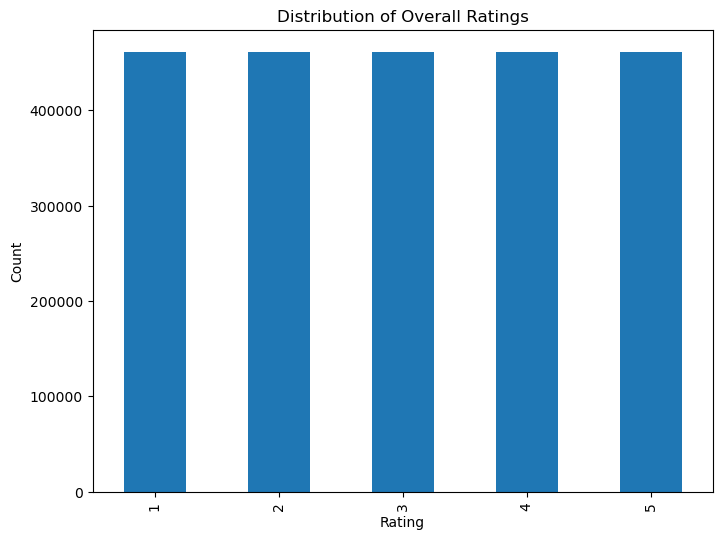

In [17]:
plt.figure(figsize=(8, 6))
data_resampled['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [18]:
data_resampled.shape

(2306595, 10)

## Second Analysis Task


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/soroush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/8g/xcrk1n01427828xyh_t8v_000000gn/T/ipykernel_18256/884341386.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checking_df['processed_reviewText'] = checking_df['reviewText'].apply(preprocess_text)
/var/folders/8g/xcrk1n01427828xyh_t8v_000000gn/T/ipykernel_18256/884341386.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checking_df['sentiment'] 

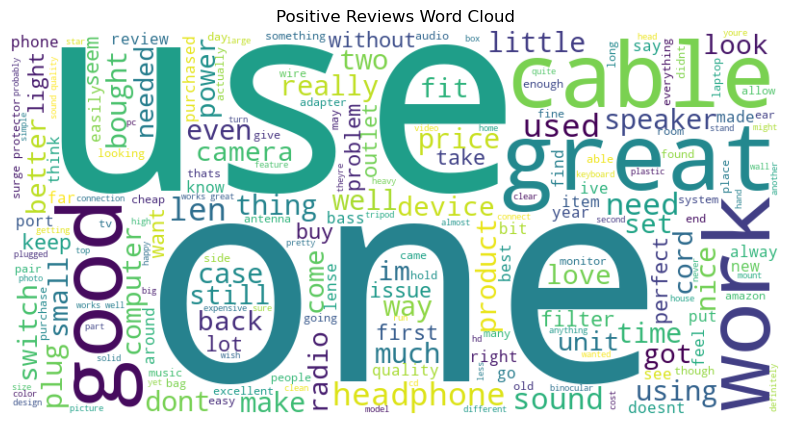

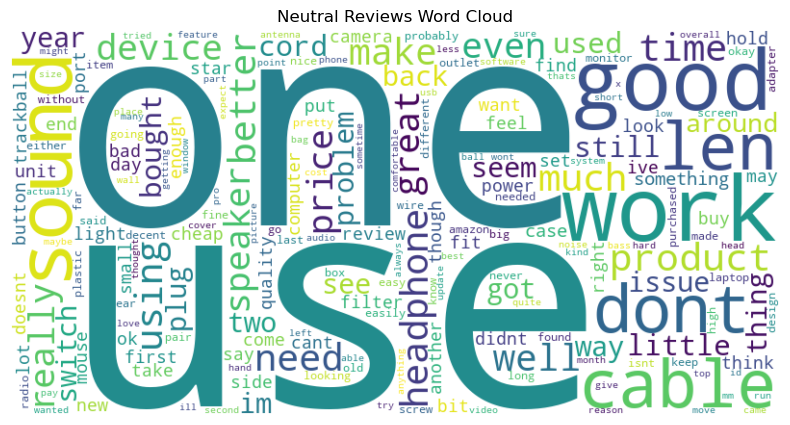

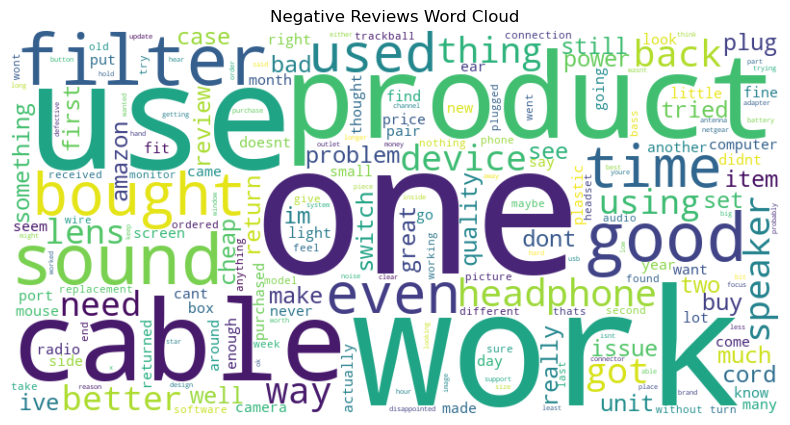

Common words between positive and negative reviews: {'opening', 'contact', 'nikon', 'enlarged', 'instruction', 'quiet', 'blown', 'hide', 'spin', 'claiming', 'pounds', 'trendnet', 'ghosting', 'flying', 'ra', 'aspacingtopmini', 'offers', 'portapros', 'scrapbook', 'delivery', 'likenew', 'focused', 'rocking', 'winding', 'waiting', 'brittle', 'ereaders', 'drywall', 'emptor', 'faceplate', 'went', 'measure', 'important', 'freezing', 'chargers', 'ready', 'mint', 'intent', 'premium', 'interrupt', 'thinks', 'popular', 'volumes', 'bookshelf', 'environment', 'adhesive', 'dollars', 'beasts', 'studs', 'treble', 'feedback', 'crappy', 'clue', 'xspro', 'girls', 'lifeless', 'peace', 'mt', 'spinning', 'separate', 'symbols', 'campus', 'coatings', 'cleared', 'sound', 'types', 'design', 'moisture', 'srs', 'exceptionally', 'interestingly', 'florida', 'surround', 'torn', 'mess', 'mail', 'explorer', 'presses', 'booth', 'marginally', 'may', 'spoiled', 'smarter', 'objects', 'blank', 'open', 'causing', 'terminal'

In [19]:
# working on a small part of the dataset due to less computation cost
checking_df = data_resampled.head(10000)

# download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# preprocess text
def preprocess_text(text):
    text = text.lower()  # to lowercase
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])  # remove nonalphabetic characters
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stop words
    return text

# apply preprocessing to reviewText
checking_df['processed_reviewText'] = checking_df['reviewText'].apply(preprocess_text)

# categorize reviews
checking_df['sentiment'] = checking_df['overall'].apply(lambda x: 'positive' if x in [4, 5] else ('neutral' if x == 3 else 'negative'))

# generating word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# word cloud for each sentiment group
positive_text = ' '.join(checking_df[checking_df['sentiment'] == 'positive']['processed_reviewText'])
neutral_text = ' '.join(checking_df[checking_df['sentiment'] == 'neutral']['processed_reviewText'])
negative_text = ' '.join(checking_df[checking_df['sentiment'] == 'negative']['processed_reviewText'])

generate_wordcloud(positive_text, 'Positive Reviews Word Cloud')
generate_wordcloud(neutral_text, 'Neutral Reviews Word Cloud')
generate_wordcloud(negative_text, 'Negative Reviews Word Cloud')

# analyze common words
positive_words = Counter(positive_text.split())
negative_words = Counter(negative_text.split())

common_words = set(positive_words.keys()).intersection(set(negative_words.keys()))
print(f"Common words between positive and negative reviews: {common_words}")

**Interpretation of common words**:

There might simply be common words both in negative and positive reviews, because there are many words we use that do not carry any specific sentiment by thhemselves, for instance 'chair'. Whoever has used 'chair' in their sentence could have been happy using it or not!

## Third Analysis Task

In [20]:
reviewer_votes = checking_df.groupby(['reviewerID', 'reviewerName'])['vote'].sum().reset_index()

top_reviewers = reviewer_votes.sort_values(by='vote', ascending=False).head(10)

# top 10 reviewers
print("Top 10 Reviewers with Most Useful Comments:")
print(top_reviewers[['reviewerName', 'vote']])

# results in another style
for idx, row in top_reviewers.iterrows():
    print(f"{row['reviewerName']}: {row['vote']} votes")

Top 10 Reviewers with Most Useful Comments:
        reviewerName  vote
5449       Mark King  40.0
4298     OrangeCrush  24.0
1221        Kevin G.  20.0
1421   Jesse Nietzer  20.0
5231  Purple Griffon  20.0
2596            Bill  20.0
5727   Samuel Bailey  20.0
7614         JeremyG  16.0
5863     Atomic Tofu  16.0
5566    Reviewer Pro  16.0
Mark King: 40.0 votes
OrangeCrush: 24.0 votes
Kevin G.: 20.0 votes
Jesse Nietzer: 20.0 votes
Purple Griffon: 20.0 votes
Bill: 20.0 votes
Samuel Bailey: 20.0 votes
JeremyG: 16.0 votes
Atomic Tofu: 16.0 votes
Reviewer Pro: 16.0 votes


## Fourth Analysis Task

/var/folders/8g/xcrk1n01427828xyh_t8v_000000gn/T/ipykernel_18256/835843668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checking_df['review_length'] = checking_df['reviewText'].apply(len)


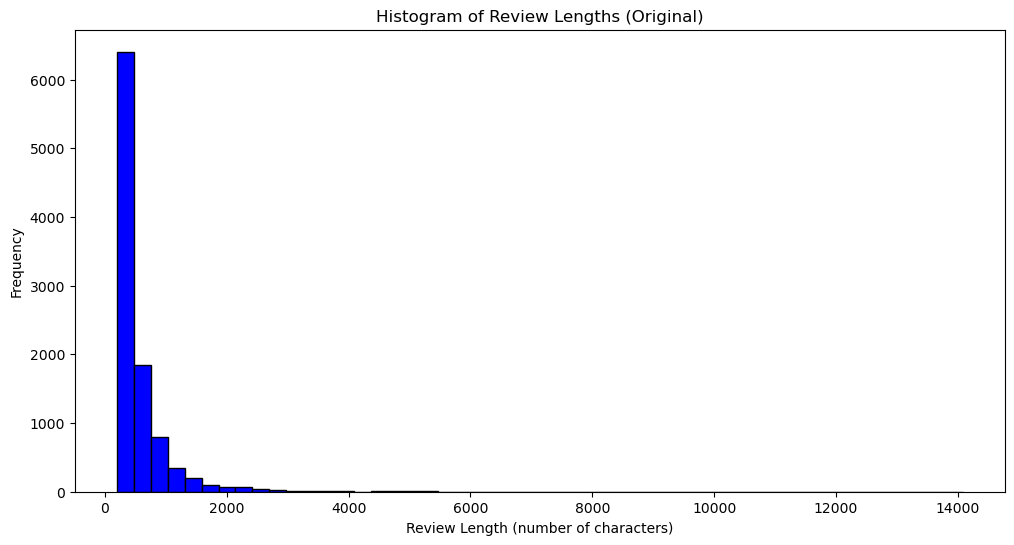

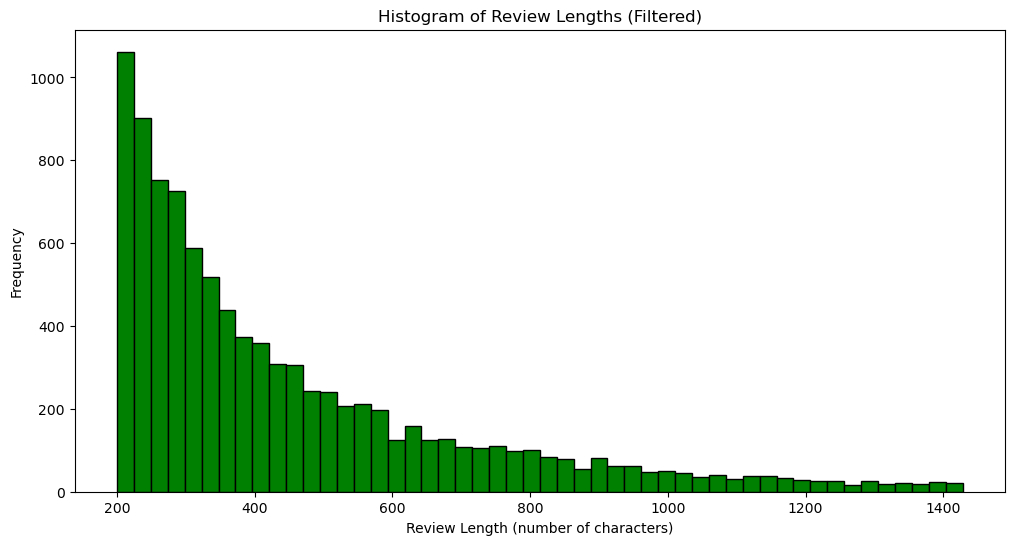

Mean review length: 549.7634
Max review length: 14076
Suggested limit for the number of characters: 1428


In [21]:
# length of each review
checking_df['review_length'] = checking_df['reviewText'].apply(len)

# histogram of the original review lengths
plt.figure(figsize=(12, 6))
plt.hist(checking_df['review_length'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Review Lengths (Original)')
plt.xlabel('Review Length (number of characters)')
plt.ylabel('Frequency')
plt.show()

# filtering by considering reviews with length less than the 95th percentile
threshold = checking_df['review_length'].quantile(0.95)
filtered_df = checking_df[checking_df['review_length'] <= threshold]

# histogram of the filtered review lengths
plt.figure(figsize=(12, 6))
plt.hist(filtered_df['review_length'], bins=50, color='green', edgecolor='black')
plt.title('Histogram of Review Lengths (Filtered)')
plt.xlabel('Review Length (number of characters)')
plt.ylabel('Frequency')
plt.show()

# analysis of the number of characters
mean_length = checking_df['review_length'].mean()
max_length = checking_df['review_length'].max()
suggested_limit = int(threshold)  # Using the 95th percentile as the suggested limit
print(f"Mean review length: {mean_length}")
print(f"Max review length: {max_length}")
print(f"Suggested limit for the number of characters: {suggested_limit}")

* The histogram of the original review lengths shows a wide range of lengths, with some very long reviews.
* After filtering out outliers (above the 95th percentile), the histogram focuses on more typical review lengths.
* Also it is good for modeling to limit the number of characters as done here. 
* This helps in reducing the computational cost without losing significant information.

## Fifth Analysis Task 


In [22]:
product_details = pd.read_csv('title_brand.csv')
product_details.head()

,asin,title,brand
0,0011300000,Genuine Geovision 1 Channel 3rd Party NVR IP S...,GeoVision
1,0043396828,"Books ""Handbook of Astronomical Image Processi...",33 Books Co.
2,0060009810,One Hot Summer,Visit Amazon's Carolina Garcia Aguilera Page
3,0060219602,Hurray for Hattie Rabbit: Story and pictures (...,Visit Amazon's Dick Gackenbach Page
4,0060786817,sex.lies.murder.fame.: A Novel,Visit Amazon's Lolita Files Page


In [23]:
five_star_reviews = checking_df[checking_df['overall'] == 5]

# five stars 
counts = five_star_reviews.groupby('asin').size().reset_index(name='five_star_count')

# get the top 10
top_products = counts.sort_values(by='five_star_count', ascending=False).drop_duplicates().head(10)

# merge the top products with product details
top_products_details = pd.merge(top_products, product_details, on='asin')
top_products_details = top_products_details[['brand', 'title', 'five_star_count']]
# dropping duplicates
top_products_details = top_products_details.drop_duplicates().reset_index().drop('index', axis=1)
# displaying the top ten
top_products_details

,brand,title,five_star_count
0,NETGEAR,NETGEAR 5-Port Gigabit Ethernet Unmanaged Swit...,237
1,Tripp Lite,Tripp Lite 1 Outlet Portable Surge Protector P...,145
2,Polk Audio,Polk Audio PSW505 12-Inch Powered Subwoofer (S...,106
3,Panasonic,Panasonic Headphones On-Ear Lightweight with X...,93
4,Tripp Lite,Tripp Lite Isobar 2 Outlet Surge Protector Pow...,90
5,Tripp Lite,Tripp Lite 10 Outlet Surge Protector Power Str...,90
6,Tiffen,Tiffen 43MM UV Protector Filter,84
7,Tiffen,Tiffen 62mm UV Protection Filter,83
8,Tiffen,Tiffen 58mm UV Protection Filter,82
9,Giotto's,Giottos AA1900 Rocket Air Blaster Large - Black,78


## Sixth Analysis Task

In [24]:
df = pd.merge(checking_df, product_details, on='asin')  

# count the number of comments for each brand  
brand_comments = df.groupby('brand').size().sort_values(ascending=False).head(10)  

# Calculating average score for each brand  
brand_avg_score = df.groupby('brand')['overall'].mean()  

# average scores for the top 10 brands  
top_brands_avg_score = brand_avg_score[brand_comments.index]  

# display  
result = pd.DataFrame({'Brand': top_brands_avg_score.index, 'Average Score': top_brands_avg_score.values})   
result = result.sort_values(by='Average Score', ascending=False).reset_index().drop('index', axis=1)
result

,Brand,Average Score
0,Canon,4.572335
1,Tripp Lite,4.421488
2,NETGEAR,4.254950
3,StarTech,4.133568
4,Belkin,4.077151
5,Panasonic,4.018919
6,Koss,4.004773
7,Hosa,4.002976
8,Celestron,3.910543
9,Tiffen,3.873840
